<a href="https://colab.research.google.com/github/george-kan/fastai/blob/main/Chapter2/Chapter_2_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
!pip install git+https://github.com/Joeclinton1/google-images-download.git


     |████████████████████████████████| 727kB 17.0MB/s 
     |████████████████████████████████| 194kB 56.3MB/s 
     |████████████████████████████████| 1.2MB 59.1MB/s 
     |████████████████████████████████| 51kB 9.1MB/s 
     |████████████████████████████████| 61kB 11.6MB/s 
  Cloning https://github.com/Joeclinton1/google-images-download.git to /tmp/pip-req-build-lswqicyq
  Running command git clone -q https://github.com/Joeclinton1/google-images-download.git /tmp/pip-req-build-lswqicyq
     |████████████████████████████████| 911kB 18.1MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=15792 sha256=71ef0656272b5150ff6e3556393a5fc10d895d8c2a4a60f7397e0a24b82748be
  Stored in directory: /tmp/pip-ephem-wheel-cache-a93ud3ku/wheels/1a/36/c9/53bd827bc241b69fe47b90731625459627f82694ecd8a88273
Successfully built google-images-download


In [2]:
from fastai.vision.all import *
from fastbook import *

In [3]:
from google_images_download import google_images_download   #importing the library

response = google_images_download.googleimagesdownload()   #class instantiation

arguments = {"keywords":"polar bear,grizzly bear,black bear,teddy bear","limit":10,"print_urls":False}   #creating list of arguments
paths = response.download(arguments)   #passing the arguments to the function
print(paths)   #printing absolute paths of the downloaded images


Item no.: 1 --> Item name = polar bear
Evaluating...
Starting Download...
Completed Image ====> 1.polar_bear_on_ice_in_svalbard_norway_ww294883.jpg
Completed Image ====> 2.387489f1b8413ff360c3eead07c710621c-polar-bears.rsquare.w1200.jpg
Completed Image ====> 3.polar_bear_with_cubs_in_wapusk_ww266666.jpg
Completed Image ====> 4.84081_nor20200720bearafp_1595259311962.jpeg
Completed Image ====> 5.polar-bear-7.jpg
Completed Image ====> 6.polar_bear_-_alaska_%28cropped%29.jpg
Completed Image ====> 7.mammal_polar_bear_cubs_fighting_alaska_michael_henry_600x300.ashx.jpg
Completed Image ====> 8.0_polar-bear-carries-the-head-of-a-polar-bear-cub-2009.jpg
Completed Image ====> 9.janet-the-polar-bear-nanuk-polar-bear-lodge-george-turner-photo.jpg
Completed Image ====> 10.1340901-polar-bear-churchill.jpg

Errors: 0


Item no.: 2 --> Item name = grizzly bear
Evaluating...
Starting Download...
Completed Image ====> 1.grizzlybearjeanbeaufort.jpg
Completed Image ====> 2.grizzly-bear-rocky-mountains-wy

In [52]:
images = paths[0]

data_transforms = transforms.Compose([
        transforms.RandomResizedCrop(128, min_scale = 0.3),
        transforms.ToTensor()])

train_x = []
train_y = []
for bear, pictures in images.items():
    train_x += [data_transforms(Image.open(x)) for x in pictures]
    train_y += [bear]*len(pictures)

In [24]:
images = paths[0]
train_x = []
train_y = []
for bear, pictures in images.items():
    train_x += [x for x in pictures]
    train_y += [bear]*len(pictures)

data_list = list(zip(train_x, train_y))

In [32]:
data_list[200]

('/content/downloads/black bear/4.black-bear-killed-ht-jef-190619_hpmain_1x1_992.jpg',
 'black bear')

In [6]:
bears = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed = 42),
    get_y = parent_label,
    item_tfms=Resize(128)
)

In [17]:
dls = bears.dataloaders('/content/downloads/')

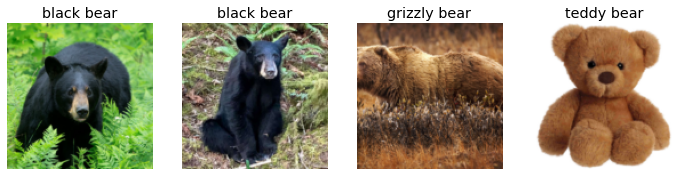

In [18]:
dls.valid.show_batch(max_n = 4, nrows = 1)

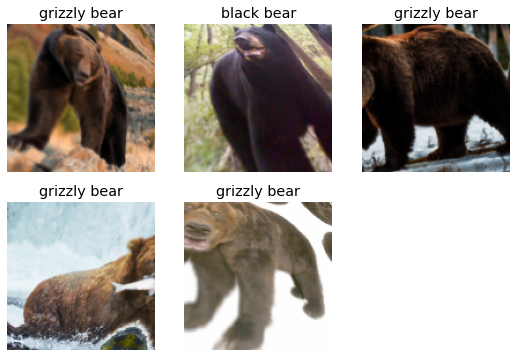

In [27]:
bears = bears.new(item_tfms = Resize(128), batch_tfms = aug_transforms(mult = 2))
dls = bears.dataloaders('/content/downloads/', bs = 5)
dls.train.show_batch(max_n = 8, nrows = 2, unique = False)

In [55]:
train_x_stacked = torch.stack(train_)

torch.Size([3, 256, 256])

In [51]:
from torchvision import datasets, models, transforms
my_img = Image.open(images['grizzly bear'][10])
my_img.resize(torch.Size([128,128]))
#my_img.torchvision.transforms.Resize(128, interpolation=2)

data_transforms = transforms.Compose([
        transforms.Resize([256, 256]),
        transforms.ToTensor()])

data_transforms(my_img)

torch.Size([3, 256, 256])